<a href="https://colab.research.google.com/github/vishnuvarthanv/iNeuron_MLD6Jun2020/blob/master/Logistics_Regression_Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

**Dataset**

The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

**Description of Variables**

The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled,
3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs


In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 
#from sklearn.cross_validation import cross_val_score 

dta =sm.datasets.fair.load_pandas().data
#add "affair" column: 1 represents having affairs, 0 represents not 

dta['affair'] = (dta.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [9]:

dta["affair"].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

[Text(0.5, 1.0, 'affair or not')]

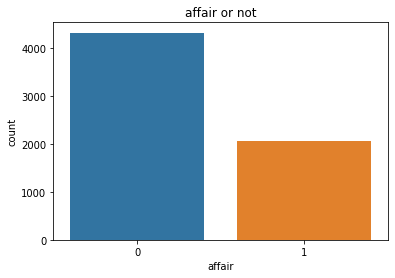

In [11]:
import seaborn as sns
sns.countplot(x=dta["affair"]).set(title = 'affair or not')

[Text(0.5, 1.0, 'Marriage Rating')]

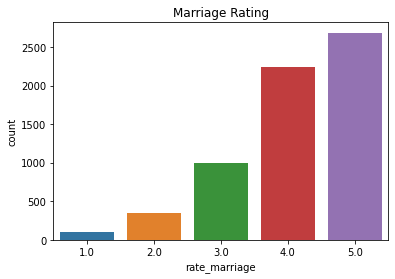

In [12]:
sns.countplot(x=dta["rate_marriage"]).set(title = 'Marriage Rating')

In [ ]:
sns.distplot(dta["age"]).set(title = "Distribution of Women's Age")

In [ ]:
sns.countplot(x=dta["children"]).set(title = 'Number of Children')

In [ ]:
sns.countplot(x=dta["religious"])

In [ ]:
sns.countplot(x=dta["educ"]).set(title = "Education Level")

In [ ]:
sns.distplot(dta["occupation"]).set(title = "Women's Occupation")

In [ ]:
sns.distplot(dta["occupation_husb"]).set(title = "Husband's Occupation")

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dta.corr(),annot=True)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
print(f'Shape of train feature:{X_train.shape}')
print(f'Shape of test feature :{X_test.shape}')
print(f'Shape of train target :{y_train.shape}')
print(f'Shape of test target  :{y_test.shape}')

Shape of train feature:(4456, 17)
Shape of test feature :(1910, 17)
Shape of train target :(4456,)
Shape of test target  :(1910,)


In [16]:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import Counter

#import scikitplot.metrics as skplt

In [17]:
model_lr =LogisticRegression()

model_lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = model_lr.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

In [23]:
print(f'Classification report : {classification_report(y_test,y_pred)}')

Classification report :               precision    recall  f1-score   support

         0.0       0.75      0.90      0.81      1275
         1.0       0.65      0.39      0.49       635

    accuracy                           0.73      1910
   macro avg       0.70      0.64      0.65      1910
weighted avg       0.72      0.73      0.71      1910



In [24]:
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')
print(f'Roc_Auc_Score : {roc_auc_score(y_test,y_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test,y_pred)}')



Accuracy Score : 0.7277486910994765
Roc_Auc_Score : 0.6419329936699089
Confusion Matrix : [[1145  130]
 [ 390  245]]


In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.72213501, 0.69858713, 0.73783359, 0.70800628, 0.71585557,
       0.72841444, 0.73113208, 0.70440252, 0.75      , 0.75314465])

In [26]:
scores.mean()

0.7249511270400758